# Data Preparation

Importing the Required Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.rcParams['figure.figsize'] = (15, 10)

Loading the Datasets

In [48]:
customers_df = pd.read_csv('C:/Users/Suthan/Forward School 2/EDA/customers_dataset.csv')
orders_df = pd.read_csv('C:/Users/Suthan/Forward School 2/EDA/orders_dataset.csv')
products_df = pd.read_csv('C:/Users/Suthan/Forward School 2/EDA/products_dataset.csv', usecols=['product_id', 'product_category_name', 'product_weight_g'])
sellers_df = pd.read_csv('C:/Users/Suthan/Forward School 2/EDA/sellers_dataset.csv')
order_payments_df = pd.read_csv('C:/Users/Suthan/Forward School 2/EDA/order_payments_dataset.csv')
product_translation_df = pd.read_csv('C:/Users/Suthan/Forward School 2/EDA/product_category_name_translation.csv')
df_order_reviews = pd.read_csv("C:/Users/Suthan/Forward School 2/EDA/order_reviews_dataset.csv")


# Data Cleaning

Checking for null values

In [49]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [50]:
order_payments_df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

# Transalating the Products names to English

In [51]:
updated_product_df = pd.merge(products_df, product_translation_df, on='product_category_name')
updated_product_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)
updated_product_df.drop('product_category_name', axis=1, inplace=True)

In [52]:
updated_product_df.head()

,product_id,product_weight_g,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,400.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,422.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,267.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,377.0,perfumery


# Exploratory Data Analysis

Converting Features Into DateTime

In [53]:
def get_part_of_day(hour):
    return (
        "Morning" if 5 <= hour <= 11
        else
        "Afternoon" if 12 <= hour <= 17
        else
        "Evening" if 18 <= hour <= 22
        else
        "Night"
    )

In [54]:
purchase_time = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['purchase_date'] = purchase_time.dt.to_period('M').astype('str')
orders_df['purchase_year'] = purchase_time.dt.year
orders_df['purchase_month'] = purchase_time.dt.month_name()
orders_df['purchase_month_number'] = purchase_time.dt.month
orders_df['purchase_day'] = purchase_time.dt.day_name()
orders_df['purchase_hour'] = purchase_time.dt.hour
orders_df['purchase_timeofday'] = orders_df['purchase_hour'].apply(get_part_of_day)

orders_df['purchase_date'] = orders_df['purchase_date'].str.replace('-','')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year,purchase_month,purchase_month_number,purchase_day,purchase_hour,purchase_timeofday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,201710,2017,October,10,Monday,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,201807,2018,July,7,Tuesday,20,Evening
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,201808,2018,August,8,Wednesday,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,201711,2017,November,11,Saturday,19,Evening
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,201802,2018,February,2,Tuesday,21,Evening


# Where do the customers and sellers come from?

Text(0, 0.5, 'Count')

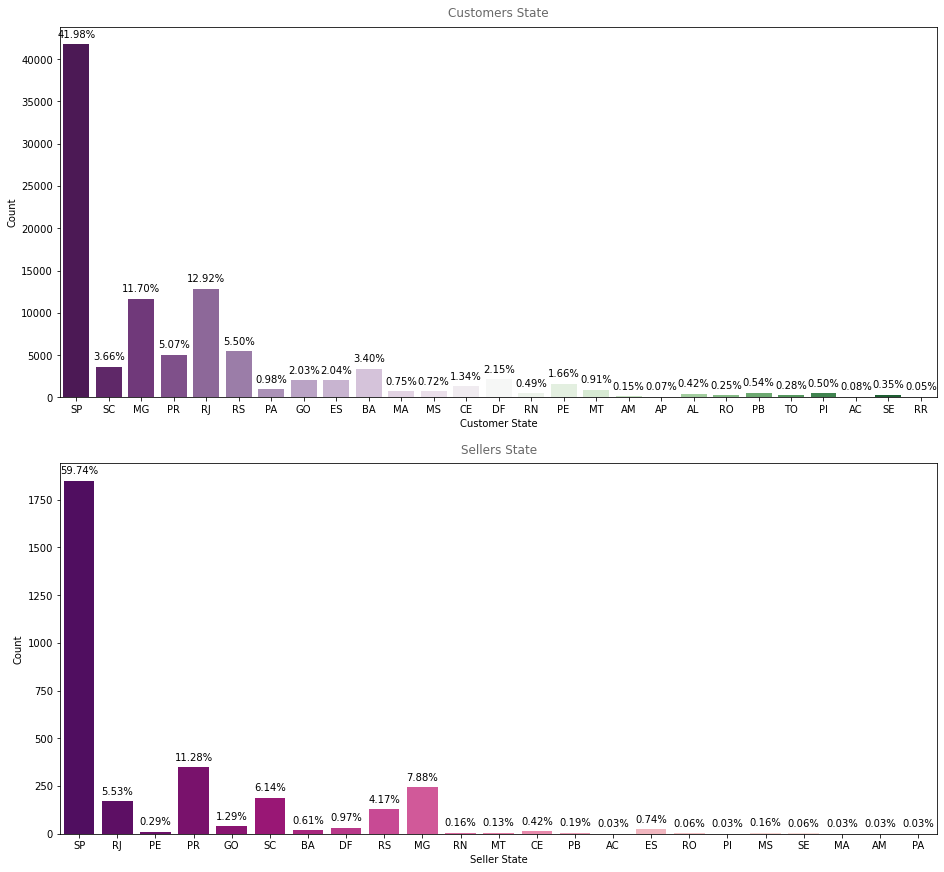

In [55]:
fig = plt.figure(constrained_layout=True, figsize=(13, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])

sns.countplot(x=customers_df['customer_state'], ax=ax1, palette='PRGn')
total = len(customers_df['customer_state'])
for p in ax1.patches:
    ax1.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set_title('Customers State', size=12, color='dimgrey', pad=10)
ax1.set_xlabel('Customer State')
ax1.set_ylabel('Count')

sns.countplot(x=sellers_df['seller_state'], ax=ax2, palette='RdPu_r')
total = len(sellers_df['seller_state'])
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax2.set_title('Sellers State', size=12, color='dimgrey', pad=10)
ax2.set_xlabel('Seller State')
ax2.set_ylabel('Count')

Most of the customers come from Sau Paulo, Rio De Janeiro and Minas Gerais on the other hand almost 60% of sellers located at Sau Paolo followed by Parana, Minas Gerais and Rio De Janeiro respectively

# What are the order status and types of payment method used by customers?

Text(0, 0.5, 'Count')

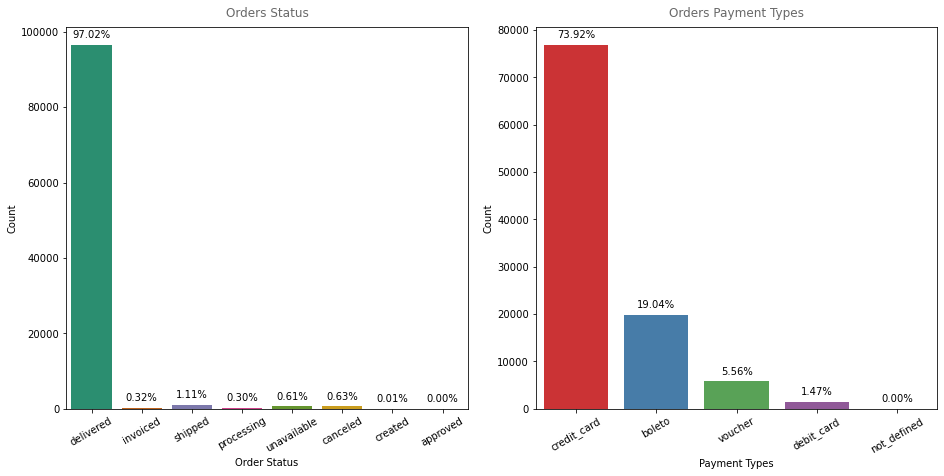

In [56]:
fig = plt.figure(constrained_layout=True, figsize=(13, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])


sns.countplot(x=orders_df['order_status'], ax=ax1 ,palette='Dark2')
total = len(orders_df['order_status'])
for tick in ax1.get_xticklabels():
    tick.set_rotation(30)
for p in ax1.patches:
    ax1.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set_title('Orders Status', size=12, color='dimgrey', pad=10)
ax1.set_xlabel('Order Status')
ax1.set_ylabel('Count')

sns.countplot(x=order_payments_df['payment_type'], ax=ax2, palette='Set1')
total = len(order_payments_df['payment_type'])
for tick in ax2.get_xticklabels():
    tick.set_rotation(30)
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax2.set_title('Orders Payment Types', size=12, color='dimgrey', pad=10)
ax2.set_xlabel('Payment Types')
ax2.set_ylabel('Count')

On the order status almost 97% of orders are delivered which shows the company is working efficiently. In addition to that 73.92% of people using credit card as their payment method which is effective during transaction process

# What type of Products sold by the sellers?

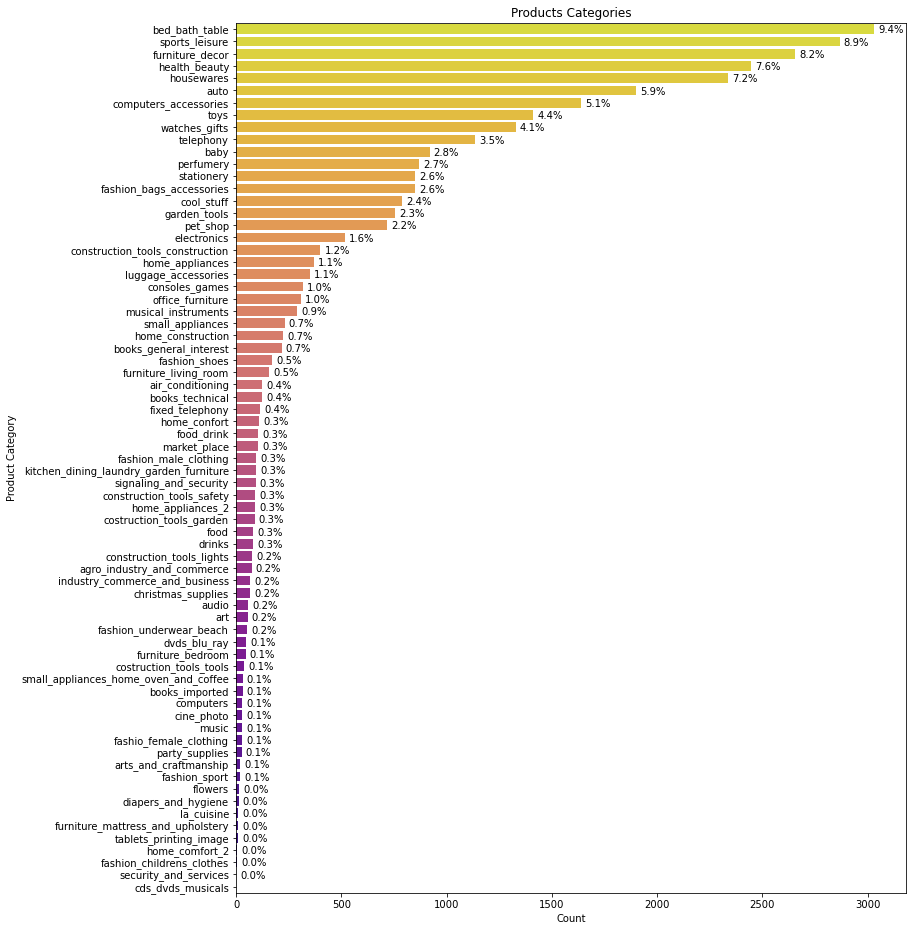

In [57]:
fig = plt.figure(figsize=(12, 16))
ax = sns.countplot(y=updated_product_df['product_category'], palette='plasma_r',
                   order = updated_product_df['product_category'].value_counts().index)
total = len(updated_product_df['product_category'])
for p in ax.patches:
    x = (p.get_width() + 80)
    y = (p.get_y() + p.get_height()/2) + 0.9
    ax.annotate('{:.1f}%'.format(100 * p.get_width()/total), (x,y),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Products Categories')
plt.ylabel('Product Category')
plt.xlabel('Count')

plt.savefig('Products')

bed-bath-tables with 9.4% were the most favourable product category, sports-leisure with 8.9%, furniture-decor with 8.2%, health-beauty with 7.6%, housewares with 7.2, auto with 5.9%, computer-accessories with 5.1%.

#  Order Comparison between 2017 and 2018(January to August)

Text(0, 0.5, 'Count')

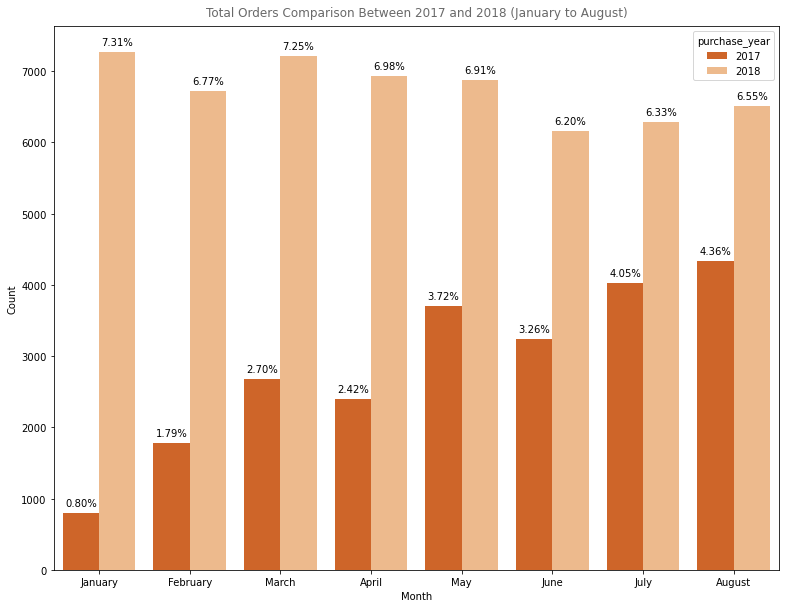

In [58]:
fig = plt.figure(figsize=(13, 10))
df_orders_compare = orders_df.query('purchase_year in (2017, 2018) & purchase_month_number <= 8')
month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
ax = sns.countplot(x=df_orders_compare['purchase_month'], palette='Oranges_r',
                   hue=df_orders_compare['purchase_year'], order=month_label)
total = len(orders_df['purchase_month'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Total Orders Comparison Between 2017 and 2018 (January to August)', size=12, color='dimgrey', pad=10)
# ax.set_xticklabels(month_label)
plt.xlabel('Month')
plt.ylabel('Count')

# Growth of Sales throughout 2016-2018

Text(0, 0.5, 'Orders')

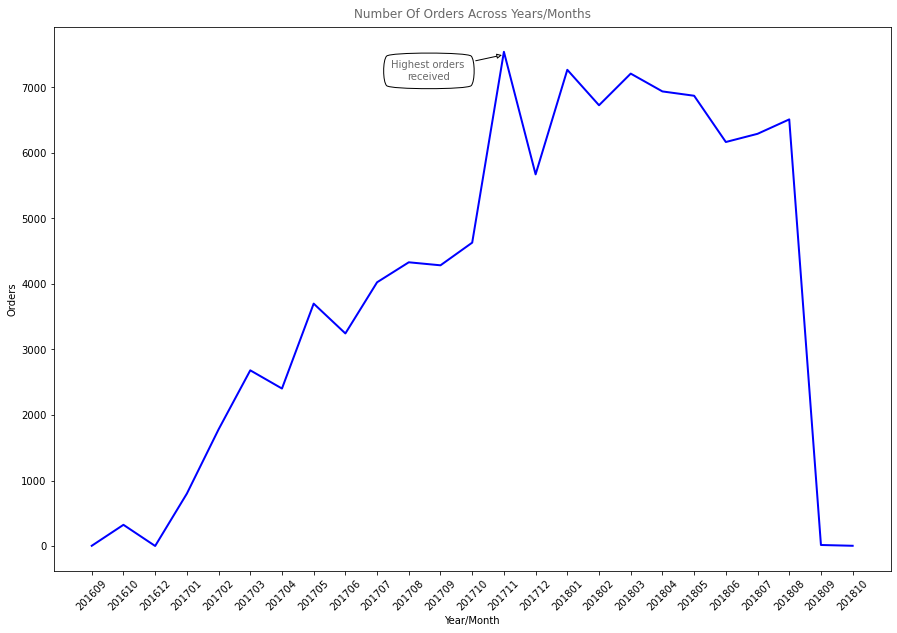

In [59]:
grouped_data_date = orders_df.groupby(['purchase_date']).count()
ax = sns.lineplot(x=grouped_data_date.index, y=grouped_data_date['order_id'], color='blue', linewidth=2)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
plt.title('Number Of Orders Across Years/Months', size=12, color='dimgrey', pad=10)
plt.xlabel('Year/Month')
plt.ylabel('Orders')



In [60]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year,purchase_month,purchase_month_number,purchase_day,purchase_hour,purchase_timeofday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,201710,2017,October,10,Monday,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,201807,2018,July,7,Tuesday,20,Evening
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,201808,2018,August,8,Wednesday,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,201711,2017,November,11,Saturday,19,Evening
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,201802,2018,February,2,Tuesday,21,Evening


In [61]:
top_10_category = updated_product_df["product_category"].value_counts().head(10)

print('Top 10 frequently repeated categories')
print('--------------------------------------')
print(top_10_category.reset_index().rename(columns={'index':'product_category',
                                              'product_category_name_english':'counts'}))

Top 10 frequently repeated categories
--------------------------------------
        product_category  product_category
0         bed_bath_table              3029
1         sports_leisure              2867
2        furniture_decor              2657
3          health_beauty              2444
4             housewares              2335
5                   auto              1900
6  computers_accessories              1639
7                   toys              1411
8          watches_gifts              1329
9              telephony              1134


# What are the frequently repeated product categories?

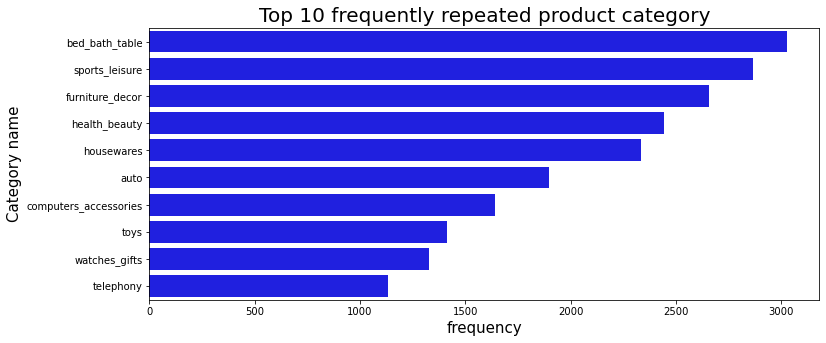

In [62]:
# Top 10 frequently repeated categories
fig=plt.figure(figsize=(12,5))

sns.barplot(y=top_10_category.index, x=top_10_category.values,color = 'blue')
plt.title('Top 10 frequently repeated product category',fontsize=20);
plt.xlabel('frequency',fontsize=15);
plt.ylabel('Category name',fontsize=15);


# Replacing the NAN values with zeros

In [65]:
df_order_reviews['review_comment_message'] = df_order_reviews['review_comment_message'].fillna(0)

In [66]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   100000 non-null  object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


# What are the review scores given by customers?

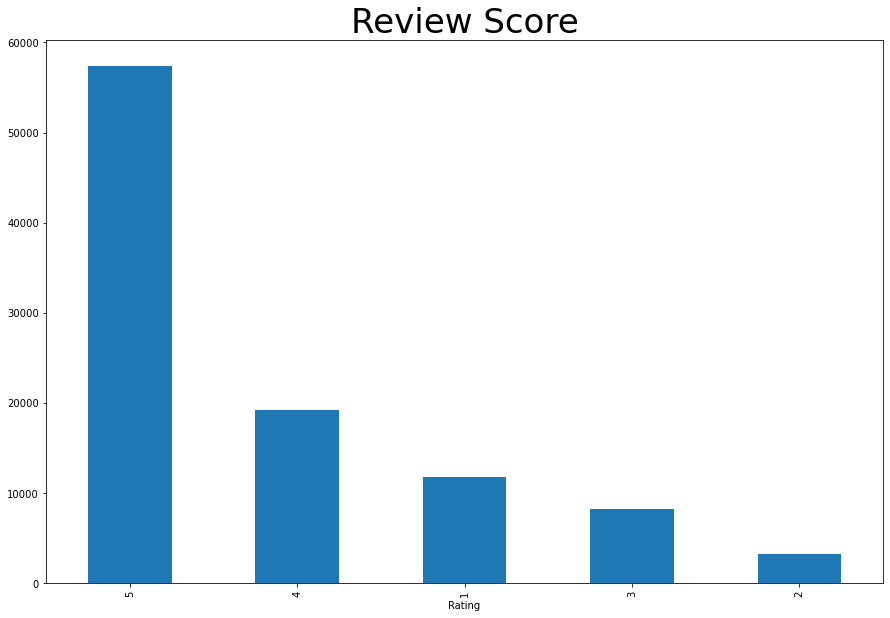

In [83]:
df_order_reviews['review_score'].value_counts().plot.bar()
plt.title('Review Score', fontsize=34);
plt.xlabel('Rating');

# The most used words by customers in their review text

In [70]:
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [71]:
stopwords.words('portuguese')

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [72]:
comments = []
stop_words = set(stopwords.words('portuguese'))


for words in df_order_reviews['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",str(words))
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    comments.append(' '.join(filtered_result))

In [73]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize
    
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suthan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


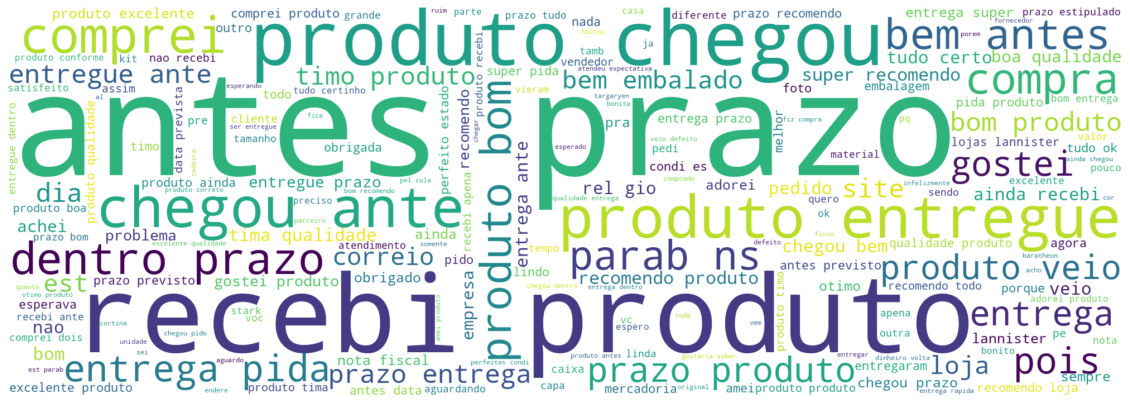

In [74]:
unique_string=(" ").join(comments)
wordcloud = WordCloud(width = 2000, height = 700,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The Wordcloud shows the most frequent words in Portuguese used by customers in their review text. A Wordcloud is a visual representation of text data, and it displays the frequency of the words by the font size. The most used words are “antes prazo” which means “before deadline” in English. This enables us to understand that overall, the customers were satisfied with their product delivered before the deadline.

# Customers locations display through MapBox

In [75]:
geo = pd.read_csv("C:/Users/Suthan/Forward School 2/EDA/geolocation_dataset.csv").sample(n=5000)

In [76]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
483707,25050,-22.752837,-43.297552,duque de caxias,RJ
443775,22270,-22.950382,-43.192058,rio de janeiro,RJ
191270,7700,-23.365718,-46.739207,caieiras,SP
784621,71505,-15.734132,-47.861062,brasilia,DF
147714,5844,-23.655180,-46.738666,são paulo,SP


In [77]:
# Map Plot
import plotly
import plotly.graph_objects as go
from plotly.offline import iplot

geo = pd.read_csv("C:/Users/Suthan/Forward School 2/EDA/geolocation_dataset.csv").sample(n=5000)

data = [go.Scattermapbox(lon = geo['geolocation_lng'], lat = geo['geolocation_lat'], marker = dict(size = 5, color = 'green', ))]

layout = dict(title = 'Brazilian E-Commerce Geolocation', mapbox = dict( accesstoken = 'pk.eyJ1IjoiaG9vbmtlbmc5MyIsImEiOiJjam43cGhpNng2ZmpxM3JxY3Z4ODl2NWo3In0.SGRvJlToMtgRxw9ZWzPFrA', center= dict(lat=-22,lon=-43), bearing=10, pitch=0, zoom=2,))
fig = dict( data=data, layout=layout )
iplot( fig, validate=False)

Most of the customer spread on east coast of Brazil especially at south areas

# Conclusion

1. Since most of the customers prefer products from these categories (bed bath tables, sports leisure, furniture decor, health-beauty, housewares, computer-accessories), new sellers are advised to sell products under this categories to make their profit larger.

2. Large amount of customers gave a rating of 5 because they're satisfied with their orders and deliveries delivered on correct time but there are improvements should be made on the courier side

3. There is great growth in profits between 2017 and 2018, orders reach their peak at 11/2017